# Graduate Rotational Internship Program
# The Sparks Foundation

## GRIP July21 Batch

### Name - TANVI GAURKHEDE
## Function : Data Science And Business Analytics
## TASK 1: Prediction using Unsupervised ML
## Algorithm Used : K-Means Clustering
### Task Description : From the given ‘Iris’ dataset, predict the optimum number of clusters
### and represent it visually.
### Dataset :  https://bit.ly/3kXTdox

#### Step 1: Importing all the required libraries.¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Importing the dataset to the notebook.

In [2]:
df = pd.read_excel("F:\\tanvi\data sets\\iris.xlsx")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#checking null values in the datset.
df.isnull().any

<bound method DataFrame.any of      sepal_length  sepal_width  petal_length  petal_width  species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]>

##### getting information of the dataset.

In [4]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

##### some basic plots for Data Visualisations.

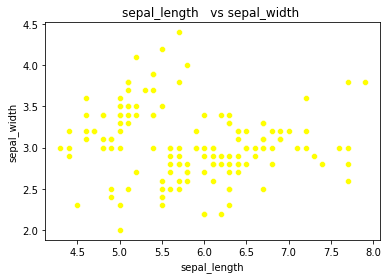

In [49]:
# Simple sctter plot between Sepal_length and Sepal_width
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'],color='yellow')
plt.title("sepal_length   vs sepal_width ")
plt.show()

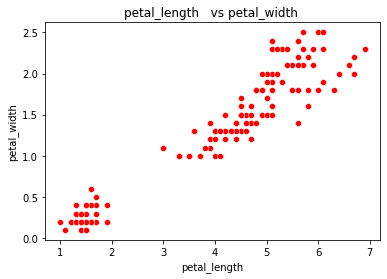

In [7]:
# Simple sctter plot between Petal_length and Petal_width
sns.scatterplot(x=df['petal_length'],y=df['petal_width'],color='red')
plt.title("petal_length   vs petal_width ")
plt.show()

C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


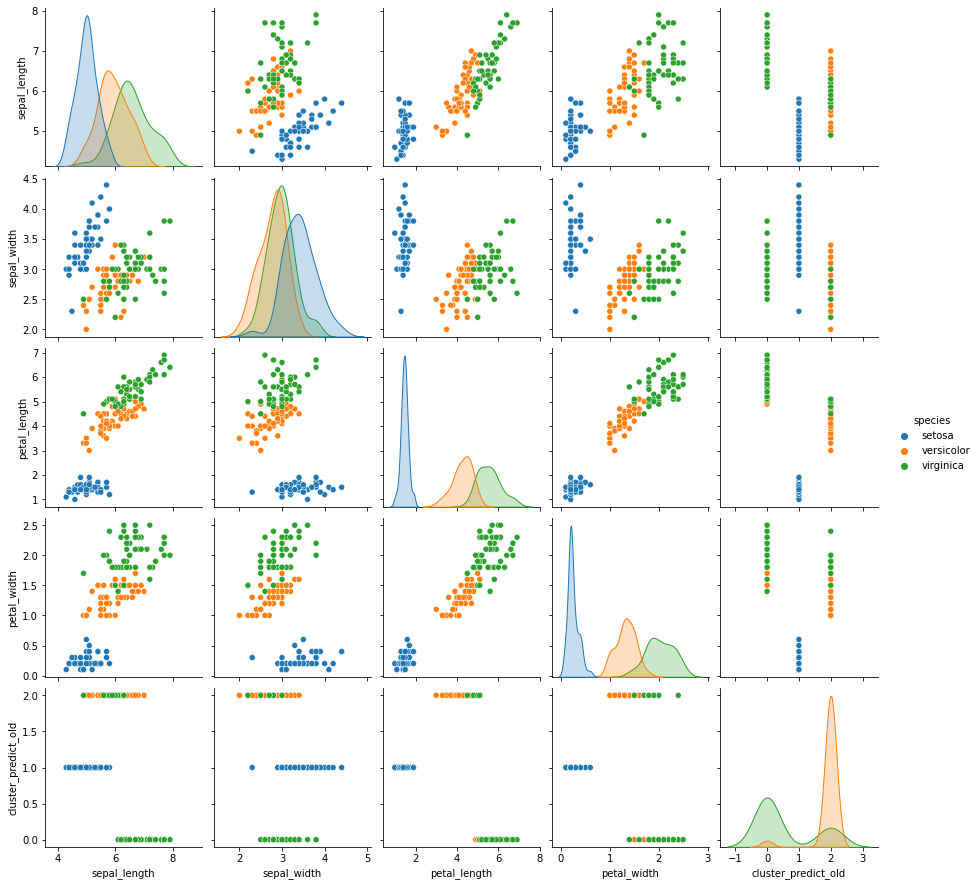

In [46]:
# simple pair plot showing variations in species according to the change in Petal_lenth ,Petal_width,Sepal_lenth and Sepal_width.
sns.pairplot ( df, hue = 'species')
plt.show()

<AxesSubplot:>

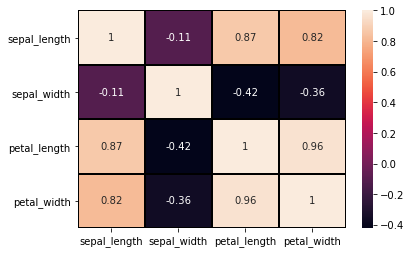

In [47]:
# A basic Heat-map.
x = df.iloc[:,[0,1,2,3]]
sns.heatmap (x.corr(), linecolor = 'black',linewidth = 1,annot = True)

#### Step 2 : Importing the Algorithhm from scikit-learn.
##### k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In [9]:
from sklearn.cluster import KMeans
SSE = []
for k in range(1,10):
    KM_model = KMeans(n_clusters=k)
    KM_model.fit_predict(df[['sepal_length','sepal_width','petal_length','petal_width']])
    SSE.append(KM_model.inertia_)
print("--")

--


##### The Elbow Method : A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

Text(0, 0.5, 'SSE')

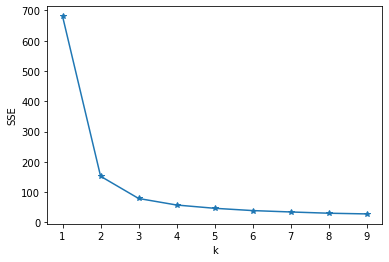

In [10]:
plt.plot(range(1,10),SSE,'-*')
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("THE ELBOW METHOD")

##### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

#### Step 3 : Training and testing of Model.

In [50]:
# applying the algorithm on the dataset and dividing into the no.of clusters.
KM_model = KMeans(n_clusters= 3 ,init = 'k-means++',max_iter = 300,n_init = 10, random_state = 0  )
cluster_predict_old = KM_model.fit_predict(df[['sepal_length','sepal_width','petal_length','petal_width']])
cluster_predict_old

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [36]:
x = df.iloc[:,[0,1,2,3]].values


#### Step 4 : The Visualisation of the Clusters with the Centroids.

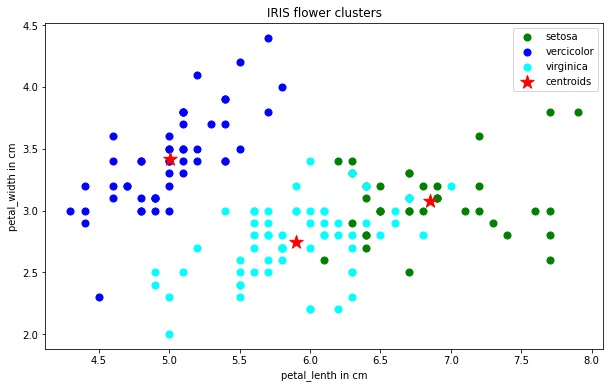

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(x[cluster_predict_old == 0,0],x[cluster_predict_old == 0,1], s = 50 , c = 'green', label = 'setosa')
plt.scatter(x[cluster_predict_old == 1,0],x[cluster_predict_old == 1,1], s = 50 , c = 'blue', label = 'vercicolor')
plt.scatter(x[cluster_predict_old == 2,0],x[cluster_predict_old == 2,1], s = 50 , c = 'cyan', label = 'virginica')
plt.scatter(KM_model.cluster_centers_[ :,0],KM_model.cluster_centers_[ :,1],s = 200
            ,c = 'red',marker ='*',label = 'centroids')

plt.title('IRIS flower clusters')
plt.ylabel('petal_width in cm')
plt.xlabel('petal_lenth in cm')
plt.legend()
plt.grid(False)
plt.show()

##### Conclusion : Thus the K-Means Clustering algorithm is successfully implimented on the provided  ' IRIS ' dataset and the optimum no.of clusters are predicted and represented in the above task.


### Thank you!!